# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [48]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

c = a[-3:]

# reverse the list

np.flip(a)

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])

z = [i*i for i in a]


In [49]:
# create a numpy array from this list
import numpy as np
b = np.array(a) # change this

In [50]:
# find the mean of b
np.mean(b)

3.5

In [51]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach

np.square(b)

array([ 1,  4,  9, 16, 25, 36])

In [63]:
# change b from a length-6 list to a 2x3 matrix

b.reshape(b, (3, 2))

ValueError: cannot reshape array of size 1 into shape (3,newaxis)

In [57]:
# find the mean value of each row

row_means = b.mean(axis=1)

AttributeError: 'function' object has no attribute 'mean'

In [54]:
# find the mean value of each column

column_means = b.mean(axis=0)

In [55]:
# find the third column of b

b[:,2]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [13]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks.csv')

In [14]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?

average = df['Calories'].mean()

In [15]:
# how many different categories of beverages are there?

len(df['Beverage'].unique())

33

In [16]:
# what is the average # calories for each beverage category?
df.groupby('Beverage')['Calories'].mean()

Beverage
Banana Chocolate Smoothie                              290.000000
Brewed Coffee                                            4.250000
Caffè Americano                                         13.750000
Caffè Latte                                            139.166667
Caffè Mocha (Without Whipped Cream)                    210.000000
Cappuccino                                              90.000000
Caramel                                                150.000000
Caramel (Without Whipped Cream)                        268.888889
Caramel Apple Spice (Without Whipped Cream)            247.500000
Caramel Macchiato                                      184.166667
Coffee                                                 210.000000
Espresso                                                 7.500000
Hot Chocolate (Without Whipped Cream)                  236.666667
Iced Brewed Coffee (With Classic Syrup)                 93.333333
Iced Brewed Coffee (With Milk & Classic Syrup)         122.222222
J

In [17]:
# what beverage preparation includes the most sugar on average?
df.groupby('Beverage_prep')['Sugars (g)'].mean().idxmax()

'Whole Milk'

In [18]:
# what is the average % daily value calcium content for each beverage?

def remove_percents(df, col):
    df[col] = df[col].str.replace('%','').astype(float)
    return df

pct_DV = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
for col in pct_DV:
    df = remove_percents(df, col)
df.groupby('Beverage_category')['Calcium (% DV)'].mean()

Beverage_category
Classic Espresso Drinks              27.344828
Coffee                                0.500000
Frappuccino® Blended Coffee          12.277778
Frappuccino® Blended Crème           13.846154
Frappuccino® Light Blended Coffee    11.333333
Shaken Iced Beverages                 4.000000
Signature Espresso Drinks            31.375000
Smoothies                            13.333333
Tazo® Tea Drinks                     23.653846
Name: Calcium (% DV), dtype: float64

In [19]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
calories = df['Protein (g)'] - df['Calories']
calories.idxmax()
df.iloc[102,:]

Beverage_category          Tazo® Tea Drinks
Beverage                          Tazo® Tea
Beverage_prep                         Short
Calories                                  0
Total Fat (g)                             0
Trans Fat (g)                             0
Saturated Fat (g)                         0
 Sodium (mg)                              0
Total Carbohydrates (g)                   0
Cholesterol (mg)                          0
Dietary Fibre (g)                         0
Sugars (g)                                0
Protein (g)                               0
Vitamin A (% DV)                          0
Vitamin C (% DV)                          0
Calcium (% DV)                            0
Iron (% DV)                             NaN
Caffeine (mg)                        Varies
Name: 102, dtype: object

(array([16., 32., 45., 49., 33., 30., 22.,  8.,  4.,  3.]),
 array([  0.,  51., 102., 153., 204., 255., 306., 357., 408., 459., 510.]),
 <BarContainer object of 10 artists>)

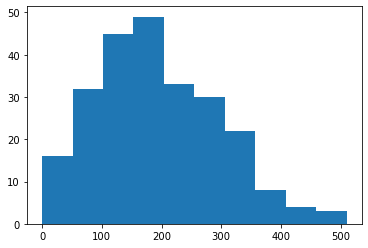

In [20]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['Calories'])

In [21]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns,
sns.displot(df['Calories'])

SyntaxError: invalid syntax (<ipython-input-21-ef5db7c2f097>, line 2)

<AxesSubplot:xlabel='Calories', ylabel='Total Fat (g)'>

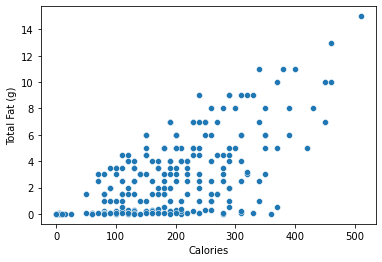

In [22]:
# plot calories against total fat using seaborn
import seaborn as sns
sns.scatterplot(data=df, x='Calories', y='Total Fat (g)')

In [23]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
df.groupby('Beverage_prep')

Beverage_prep
2% Milk               AxesSubplot(0.125,0.125;0.775x0.755)
Doppio                AxesSubplot(0.125,0.125;0.775x0.755)
Grande                AxesSubplot(0.125,0.125;0.775x0.755)
Grande Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Short                 AxesSubplot(0.125,0.125;0.775x0.755)
Short Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Solo                  AxesSubplot(0.125,0.125;0.775x0.755)
Soymilk               AxesSubplot(0.125,0.125;0.775x0.755)
Tall                  AxesSubplot(0.125,0.125;0.775x0.755)
Tall Nonfat Milk      AxesSubplot(0.125,0.125;0.775x0.755)
Venti                 AxesSubplot(0.125,0.125;0.775x0.755)
Venti Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Whole Milk            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Calories, dtype: object

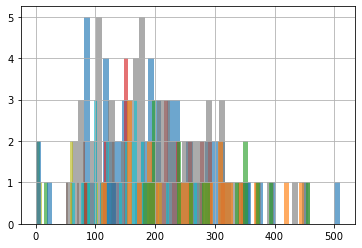

In [24]:
df.groupby("Beverage_prep")["Calories"].hist(bins = 40, alpha = 0.65)